<a href="https://colab.research.google.com/github/DataBook4U/NFT_Project/blob/master/NFTsTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install snscrape
!pip install scipy
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.3 MB/s eta 0:00:00


In [4]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [5]:
queries = ["(from:tate) until:2023-02-01 since:2020-01-01",  #Tate Museum, London
          "(from:MuseumModernArt) until:2023-02-01 since:2020-01-01",  #Museum of Modern Art, New York
          "(from:SFMOMA) until:2023-02-01 since:2020-01-01",  #Museum of Modern Art, San Francisco
          "(from:metmuseum) until:2023-02-01 since:2020-01-01",  #Metropolitan Museum of Art, New York
          "(from:GettyMuseum) until:2023-02-01 since:2020-01-01",  #Getty Museum, Los Angeles
          "(from:WomenInTheArts) until:2023-02-01 since:2020-01-01",  #National Museum of Women in the Arts
          "(from:hirshhorn) until:2023-02-01 since:2020-01-01",  #Hirshorn Museum of modern & contemporary art
          "(from:MOCAlosangeles) until:2023-02-01 since:2020-01-01",  #MOCA, Los Angeles
          "(from:CentrePompidou) until:2023-02-01 since:2020-01-01", #Centre Pompidou, Paris
          "(from:acropolismuseum) until:2023-02-01 since:2020-01-01", #Acropolis Museum, Athens
          "(from:hermitage_eng) until:2023-02-01 since:2020-01-01", #The State Hermitage, St.-Petersburg
          "(from:UffiziGalleries) until:2023-02-01 since:2020-01-01", #The Uffizi Gallery, Florence
          "(from:rijksmuseum) until:2023-02-01 since:2020-01-01", #The Rijks Museum, Amsterdam
          "(from:MuseeOrsay) until:2023-02-01 since:2020-01-01", #Musée d'Orsay
          "(from:MuseoGuggenheim) until:2023-02-01 since:2020-01-01", #Guggenheim Museum, Bilbao
          "(from:museoreinasofia) until:2023-02-01 since:2020-01-01", #Museo Reina Sofiá
          "(from:Stedelijk) until:2023-02-01 since:2020-01-01", #Stedelijk Museum
          "(from:artinstitutechi) until:2023-02-01 since:2020-01-01", #The Art Institue of Chicago
          "(from:MCA_Australia) until:2023-02-01 since:2020-01-01", #MCA Australia
          "(from:museofridakahlo) until:2023-02-01 since:2020-01-01" #Frida Kahlo Museum, Mexico
          ]  


tweets = []
limit = 80000

for query in queries:
  for tweet in sntwitter.TwitterSearchScraper(query).get_items():
      if len(tweets) == limit:
        break
      else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])
print(df)

<ipython-input-5-c07b4e0d18f8>:32: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
<ipython-input-5-c07b4e0d18f8>:32: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                           Date             User  \
0     2023-01-31 12:54:03+00:00             Tate   
1     2023-01-31 09:39:00+00:00             Tate   
2     2023-01-30 18:05:37+00:00             Tate   
3     2023-01-30 12:47:05+00:00             Tate   
4     2023-01-29 12:41:05+00:00             Tate   
...                         ...              ...   
44801 2020-01-04 17:15:06+00:00  museofridakahlo   
44802 2020-01-03 21:15:05+00:00  museofridakahlo   
44803 2020-01-03 03:58:45+00:00  museofridakahlo   
44804 2020-01-03 02:00:17+00:00  museofridakahlo   
44805 2020-01-01 15:01:51+00:00  museofridakahlo   

                                                   Tweet  
0      Cina Aissa, Learning Assistant, shares her per...  
1      @julienchenjl Hi Julien! Thank you for getting...  
2      ‘My breath is part of the universe pulsating.’...  
3      Our #WorkOfTheWeek is this vibrant oil paintin...  
4      What does your Sunday sound like? 🎵\n\n🎹 Willi...  
...                  

In [6]:
df_nft = df[df['Tweet'].str.contains("NFT")]
print(df_nft)

                           Date             User  \
5087  2022-11-30 16:11:28+00:00  MuseumModernArt   
5601  2021-12-06 16:08:03+00:00  MuseumModernArt   
5607  2021-12-02 22:45:43+00:00  MuseumModernArt   
5608  2021-12-02 22:45:21+00:00  MuseumModernArt   
5617  2021-11-19 18:26:31+00:00  MuseumModernArt   
5623  2021-11-16 18:30:45+00:00  MuseumModernArt   
5858  2021-05-02 14:38:00+00:00  MuseumModernArt   
5863  2021-04-30 14:28:45+00:00  MuseumModernArt   
22917 2021-10-12 12:00:12+00:00   WomenInTheArts   
24813 2022-09-20 20:02:23+00:00        hirshhorn   
25418 2022-10-21 20:55:49+00:00   MOCAlosangeles   
27555 2021-06-08 10:23:11+00:00   CentrePompidou   
32149 2020-05-03 13:12:00+00:00      rijksmuseum   
40817 2021-07-26 15:02:13+00:00  museoreinasofia   

                                                   Tweet  
5087   “If I push my compass to the edge of imaginati...  
5601   What does modern art look like to a machine? A...  
5607   On December 8, dive into the world 

In [7]:
df_nft = df[df['Tweet'].str.contains("NFT")]
tweets_nft = df_nft['Tweet'].tolist()

sentiments = []

for tweet in tweets_nft:
    tweet_words = []
    for word in tweet.split(' '):
        if word.startswith('@') and len(word) > 1:
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)
    tweet_proc = " ".join(tweet_words)

    # load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
# output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
output = model(**encoded_tweet)

scores = output[0][0].detach().numpy()
scores = softmax(scores)

for i in range(len(scores)):
    
    l = labels[i]
    s = scores[i]
    print(l,s)

Negative 0.05142996
Neutral 0.89769346
Positive 0.05087658


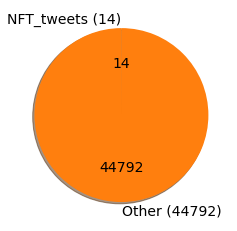

In [8]:
# Plotting the small amount of NFT tweets among the total scrapped amount:

total_entries = 44806
interesting_entries = 14
other_entries = total_entries - interesting_entries

# Create a pie chart
labels = ['NFT_tweets ({})'.format(interesting_entries), 'Other ({})'.format(other_entries)]
sizes = [interesting_entries, other_entries]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: '{:.0f}'.format(pct * total_entries / 100),
        textprops={'fontsize': 14}, shadow=True, startangle=90)

# Display the chart
plt.show()